In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [2]:
speed_matrix = pd.read_pickle("/workspaces/STdata_prediction/src/GRU-D-zhiyongc/input/speed_matrix_2015")
speed_matrix_s = np.split(speed_matrix, 8)
speed_matrix

/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


ID,d005es15036,d005es15125,d005es15214,d005es15280,d005es15315,d005es15348,d005es15410,d005es15465,d005es15531,d005es15569,...,i520es00526,i520es00560,i520es00624,i520es00684,i520es00714,i520es00746,i520es00770,i520es00861,i520es00935,i520es00972
stamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,61.939138,64.280883,62.077397,60.786423,63.120675,64.448315,63.411123,64.739481,63.009918,65.264902,...,64.092842,60.397897,62.045617,62.099860,63.555292,63.625611,62.118397,68.112571,66.567829,62.032062
2015-01-01 00:05:00,59.232527,65.082450,64.808345,65.853953,59.206229,62.496716,65.992183,64.718051,61.244073,65.608728,...,64.244069,64.091079,65.082815,59.930435,63.817700,47.836660,54.307249,59.022999,58.949034,61.212069
2015-01-01 00:10:00,61.991801,65.309123,64.803916,64.266082,62.239202,63.816610,60.196829,65.447790,63.797764,66.017157,...,59.839932,63.624790,57.179902,62.603473,64.117791,58.099941,58.923199,58.710086,56.671427,57.488732
2015-01-01 00:15:00,62.480655,65.191651,67.206597,63.988427,65.808507,64.757556,62.011448,66.334476,61.702734,65.735430,...,65.230148,66.042141,61.952397,58.193563,55.949144,60.140768,57.117960,64.368119,57.892398,64.087189
2015-01-01 00:20:00,62.490484,65.287669,67.323285,64.707409,65.708663,65.358370,65.091449,63.095048,62.186795,65.097373,...,66.005431,61.455915,62.117347,63.089581,62.961678,62.849955,54.681552,62.795588,62.545365,64.567285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 23:35:00,64.156852,68.129409,70.269650,65.745934,67.223098,62.803580,66.982529,64.760316,62.761144,60.495154,...,70.066408,63.367942,66.094884,68.065638,62.846860,64.501520,68.182001,65.238120,67.215485,65.230670
2015-12-31 23:40:00,64.579427,69.304874,68.958945,67.132535,68.702611,66.103100,64.910054,69.135301,64.736925,69.439853,...,65.273425,61.887890,61.133866,59.637602,60.473464,65.427178,65.831008,60.147810,66.217126,63.406671
2015-12-31 23:45:00,64.493959,67.105173,69.314504,66.137782,67.119293,65.351578,59.830549,72.634073,63.414815,67.153952,...,66.674942,64.887300,66.563737,63.791361,62.694436,64.760695,64.563787,60.436108,66.263599,64.096277


In [3]:
n_splits = 256
split_size = len(speed_matrix) // n_splits
speed_matrix_splits = [speed_matrix.iloc[i*split_size:(i+1)*split_size, :] for i in range(n_splits)]

/tmp/ipykernel_129923/722169367.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


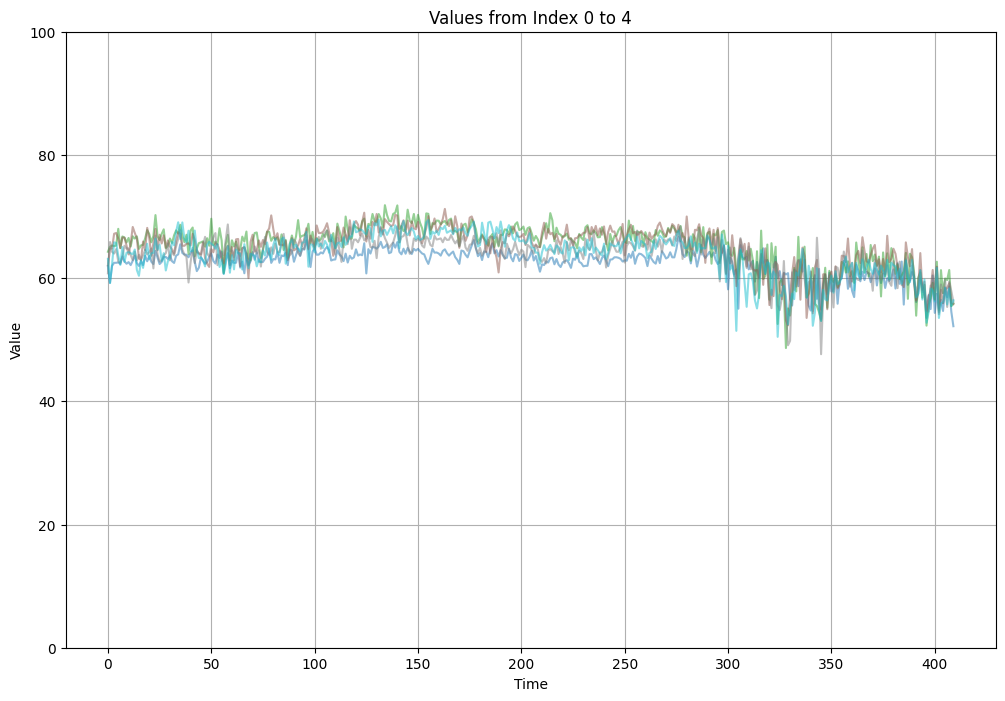

In [4]:
def plot_graph(speed_values, start_index, end_index):
    plt.figure(figsize=(12, 8))
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用

    for i, idx in enumerate(range(start_index, end_index + 1)):
        if idx < speed_values.shape[1]:  # Ensure the index is within bounds
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Index {idx}', 
                     color=colors(i), alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Values from Index {start_index} to {end_index}')
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.show()

# 使用例: インデックス0から4までの値をプロット
plot_graph(speed_matrix_splits[0], 0, 4)

In [16]:
# ファイルのパス
file_path = '/workspaces/STdata_prediction/src/LGnet/input/metr-la.h5'

# .h5ファイルの読み取り専用モードでの読み込み
with h5py.File(file_path, 'r') as f:
    # データセットのリストを取得
    dataset_list = list(f.keys())
    print("Available datasets:", dataset_list)

    # dfグループ内のデータセットを取得
    df_group = f['df']
    print(f"\nGroups and datasets in 'df': {list(df_group.keys())}\n")

    # 各データセットの内容を表示
    for key in df_group.keys():
        data = df_group[key][:]
        print(f"Dataset: {key}")
        print(data.shape)
        print("\n")

Available datasets: ['df']

Groups and datasets in 'df': ['axis0', 'axis1', 'block0_items', 'block0_values']

Dataset: axis0
(207,)


Dataset: axis1
(34272,)


Dataset: block0_items
(207,)


Dataset: block0_values
(34272, 207)




In [17]:
with h5py.File(file_path, 'r') as f:
    # dfグループ内のデータセットを取得
    df_group = f['df']

    # 各データセットを取得
    axis0 = df_group['axis0'][:]
    axis1 = df_group['axis1'][:]
    block0_items = df_group['block0_items'][:]
    block0_values = df_group['block0_values'][:]

    # DataFrameの作成
    df = pd.DataFrame(block0_values, index=axis1, columns=block0_items)

# DataFrameの表示
print(df.head())

                     b'773869'  b'767541'  b'767542'  b'717447'  b'717446'  \
1330560000000000000  64.375000  67.625000  67.125000  61.500000  66.875000   
1330560300000000000  62.666667  68.555556  65.444444  62.444444  64.444444   
1330560600000000000  64.000000  63.750000  60.000000  59.000000  66.500000   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   

                     b'717445'  b'773062'  b'767620'  b'737529'  b'717816'  \
1330560000000000000  68.750000     65.125     67.125  59.625000  62.750000   
1330560300000000000  68.111111     65.000     65.000  57.444444  63.333333   
1330560600000000000  66.250000     64.500     64.250  63.875000  65.375000   
1330560900000000000   0.000000      0.000      0.000   0.000000   0.000000   
1330561200000000000   0.000000      0.000      0.000   0.000000   0.000000   

                     ...  b'772167'  b'769372'  b'774204'  b'7

In [18]:
df

,b'773869',b'767541',b'767542',b'717447',b'717446',b'717445',b'773062',b'767620',b'737529',b'717816',...,b'772167',b'769372',b'774204',b'769806',b'717590',b'717592',b'717595',b'772168',b'718141',b'769373'
1330560000000000000,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
1330560300000000000,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
1330560600000000000,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
1330560900000000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1330561200000000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340840100000000000,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
1340840400000000000,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
1340840700000000000,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
1340841000000000000,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


/tmp/ipykernel_129923/722169367.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


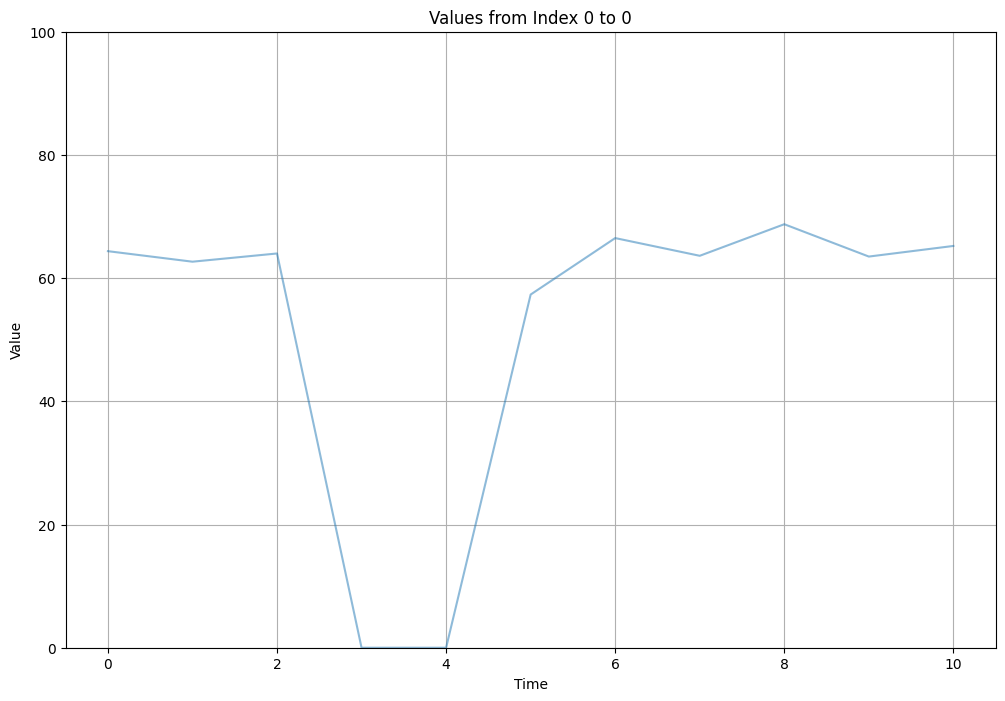

In [21]:
plot_graph(np.array_split(df, 3427)[0], 0, )

In [9]:
# ファイルのパス
file_path = '/workspaces/STdata_prediction/src/LGnet/input/pems-bay.h5'

# .h5ファイルの読み取り専用モードでの読み込み
with h5py.File(file_path, 'r') as f:
    # データセットのリストを取得
    dataset_list = list(f.keys())
    print("Available datasets:", dataset_list)

    # dfグループ内のデータセットを取得
    df_group = f['speed']
    print(f"\nGroups and datasets in 'df': {list(df_group.keys())}\n")

    # 各データセットの内容を表示
    for key in df_group.keys():
        data = df_group[key][:]
        print(f"Dataset: {key}")
        print(data.shape)
        print("\n")

Available datasets: ['speed']

Groups and datasets in 'df': ['axis0', 'axis1', 'block0_items', 'block0_values']

Dataset: axis0
(325,)


Dataset: axis1
(52116,)


Dataset: block0_items
(325,)


Dataset: block0_values
(52116, 325)




In [10]:
with h5py.File(file_path, 'r') as f:
    # dfグループ内のデータセットを取得
    df_group = f['speed']

    # 各データセットを取得
    axis0 = df_group['axis0'][:]
    axis1 = df_group['axis1'][:]
    block0_items = df_group['block0_items'][:]
    block0_values = df_group['block0_values'][:]
    
    # DataFrameの作成
    df = pd.DataFrame(block0_values, index=axis1, columns=block0_items)

# DataFrameの表示
df

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
1483228800000000000,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,69.0,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
1483229100000000000,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,68.2,...,68.4,67.3,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4
1483229400000000000,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,67.8,...,68.4,67.4,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9
1483229700000000000,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,67.8,...,68.5,67.5,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6
1483230000000000000,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,67.8,...,68.5,67.7,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498865700000000000,70.9,66.3,68.4,61.0,61.8,66.9,66.0,67.4,65.4,69.3,...,64.6,66.8,64.7,61.1,68.4,61.4,70.5,68.2,71.6,66.2
1498866000000000000,71.3,66.6,68.7,60.9,62.0,66.2,66.5,68.2,64.9,69.1,...,65.1,67.3,64.8,60.8,69.8,62.2,69.4,68.6,71.6,68.4
1498866300000000000,71.4,66.9,68.1,61.1,62.0,66.7,65.8,68.2,64.2,69.1,...,64.9,66.5,64.6,61.3,69.5,63.8,70.6,68.4,71.6,66.6
1498866600000000000,72.2,66.5,68.0,61.1,62.5,65.8,67.1,68.3,64.0,67.3,...,64.1,65.9,64.8,61.3,69.6,64.2,70.2,68.7,71.6,68.4


/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/tmp/ipykernel_129923/722169367.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


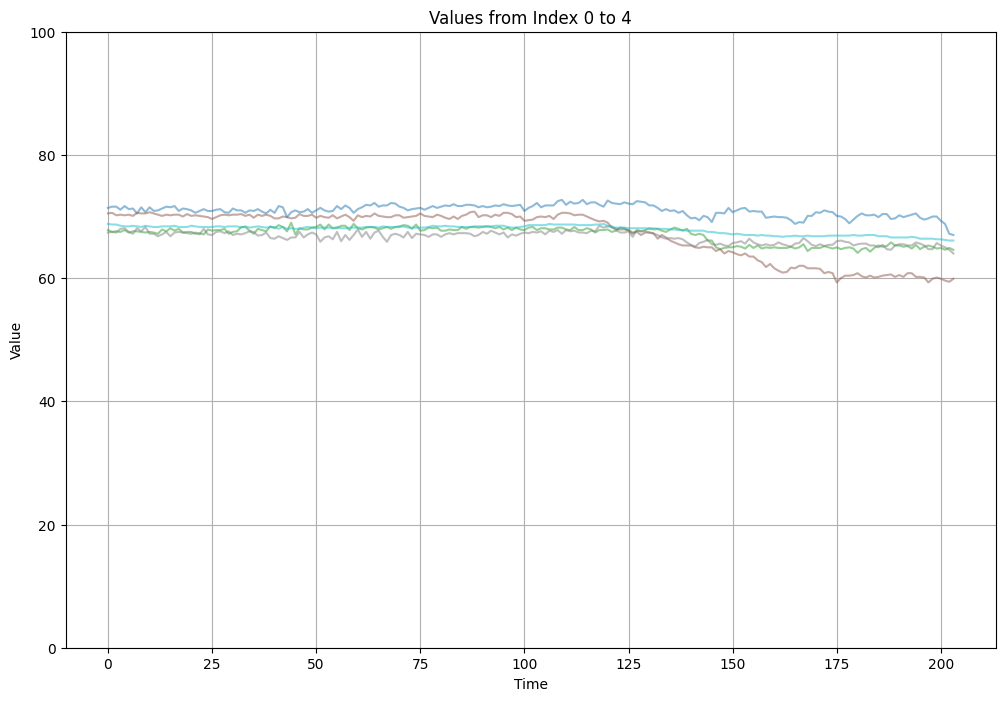

In [11]:
plot_graph(np.array_split(df, 256)[0], 0, 4)

In [12]:
# 行列全体の0の値の数をカウント
zero_count = (df == 0).sum().sum()

# 行列の全要素数
total_elements = df.size

# 0の値を持つ割合を計算
zero_rate = zero_count / total_elements

# 結果を表示
print("Zero rate for the entire matrix:")
print(zero_rate)

Zero rate for the entire matrix:
3.075978438630983e-05


In [13]:
# 最大要素と最小要素を返す関数
def get_max_min_elements(dataframe):
    max_element = dataframe.max().max()
    min_element = dataframe.min().min()
    return max_element, min_element

# 関数を呼び出して結果を表示
max_element, min_element = get_max_min_elements(df)
print("Maximum element in the matrix:", max_element)
print("Minimum element in the matrix:", min_element)

Maximum element in the matrix: 85.1
Minimum element in the matrix: 0.0


In [14]:
Mask = np.where(df == 0, 0, 1)

In [15]:
Mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])